In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import numpy as np
%matplotlib inline
from tiny_model import *

In [ ]:
#https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip

In [4]:
path='data/'
log=pd.read_csv(path+'driving_log.csv', names=['c','l','r','angle','throttle','break','speed'])

before stratifing [   6    7  101  394 5767 1405  304   44    6    2]
after stratifing [ 50 100 100 500 500 500 500 100 100  50]


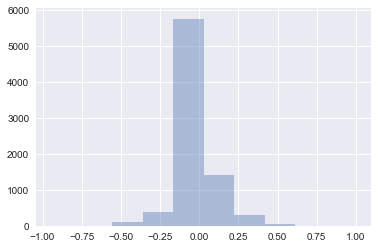

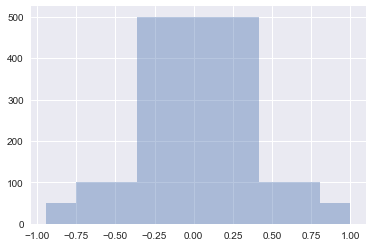

In [28]:
samples = load_samples(path)
angles0 = sample_angles(samples)
sns.distplot(angles0, bins=10, kde=False);

strat = stratify_samples(samples)
sangles = sample_angles(strat)
plt.figure()
sns.distplot(sangles, bins=10, kde=False);

In [18]:
nvidia= tiny_model({})
nvidia.load_weights('tiny.hd5')

In [22]:
num_samples = len(log.c)
batch_size=32
def generator():
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = log.c[offset:offset+batch_size]
            images = []
            for batch_sample in batch_samples:
                file = batch_sample.split('/')[-1]
                file = path+'/IMG/' + file
                img = cv2.imread(file)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
                img = cv2.resize(img,(32,16))
                img = img[:, :, 1:2]                
                images.append(img)

            X = np.array(images)
            yield X
    
pred = nvidia.predict_generator(generator(), val_samples=num_samples)

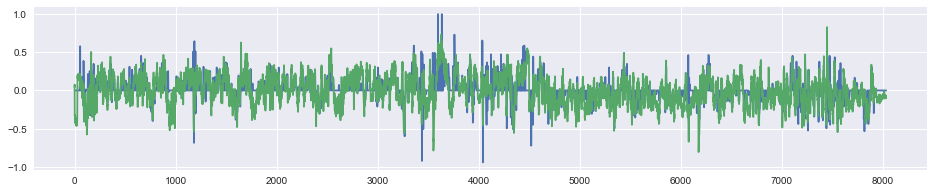

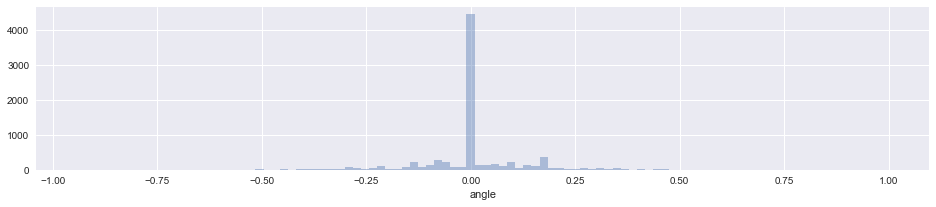

In [23]:
plt.figure(figsize=[16,3])
plt.plot(log.angle)
plt.plot(pred);
plt.figure(figsize=[16,3])
dp = sns.distplot(log.angle, bins=100, kde=False);
#dp.figure.get_axes()[0].set_yscale('log')

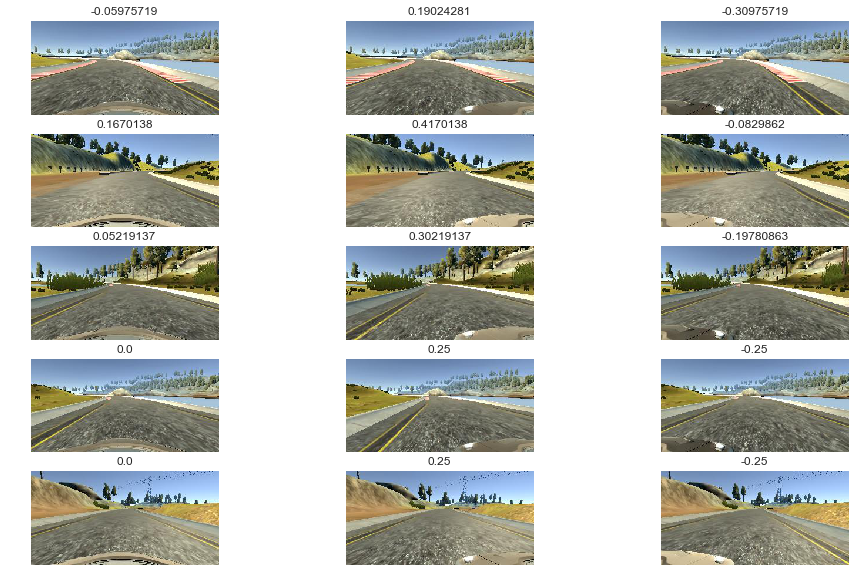

In [37]:
n = 5
fig = plt.figure(figsize=[16,n*2])
for i in range(n):
    r = random.randint(0,log.shape[0])
    for s in range(3):
        fig.add_subplot(n,3,1+i*3+s)
        file = path + '/IMG/'+ log.iloc[r,s].split('/')[-1]
        img = cv2.imread(file)
        plt.axis('off')
        corr = 0
        if s==1:
            corr=0.25
        if s==2:
            corr=-0.25

        plt.title(log.iloc[r,3] + corr)
        plt.imshow(img[..., ::-1], cmap='hsv')

In [33]:
from keras.models import load_model
m=load_model('model.hd5')

In [36]:
m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
cropping2d_1 (Cropping2D)        (None, 65, 320, 3)    0           cropping2d_input_2[0][0]         
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 65, 320, 3)    0           cropping2d_1[0][0]               
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 31, 158, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 14, 77, 36)    21636       convolution2d_1[0][0]            
___________________________________________________________________________________________